In [12]:
import torch
import torchvision
from torch.autograd import Variable
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    
[
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]

)

In [14]:
trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                           shuffle=True, num_workers=0, pin_memory=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=transform)
validation_loader = torch.utils.data.DataLoader(testset, batch_size=4,
                                                shuffle=False, num_workers=0, pin_memory=False)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
train_loader

In [16]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
COLOR_CHANNELS = 3
EPOCHS = 50
LEARNING_RATE = 0.001
BATCH_SIZE = 32
BATCH_IMAGE_COUNT = 10000
CLASSES = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
N_CLASSES = len(CLASSES)
PLOT = False

  dog plane horse plane


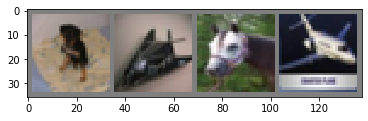

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Функция, которая показывает изображения
def imshow(img):
    img = img / 2 + 0.5     # деномрировка
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# достаем случайные картинки из обучающей выборки
dataiter = iter(train_loader)
images, labels = dataiter.next()

# вызываем функцию, реализующую демонстрацию изображений, что мы можем видеть на них?
imshow(torchvision.utils.make_grid(images))
# выведем метки классов отрисованных изображений
print(' '.join('%5s' % CLASSES[labels[j]] for j in range(4)))

In [18]:
class Net(torch.nn.Module):
    def __init__(self, n_hidden_nodes, n_hidden_layers):
        super(SecondNet, self).__init__()
        # Определяем слои
        self.fc1 = torch.nn.Linear(IMAGE_WIDTH * IMAGE_WIDTH * COLOR_CHANNELS,
                                   n_hidden_nodes)
        self.dropout1 = torch.nn.Dropout(0.2)  
        self.fc2 = torch.nn.Linear(n_hidden_nodes, n_hidden_nodes)
        self.dropout2 = torch.nn.Dropout(0.2)
        self.out = torch.nn.Linear(n_hidden_nodes, N_CLASSES)

    def forward(self, x):
        x = x.view(-1, IMAGE_WIDTH * IMAGE_WIDTH * COLOR_CHANNELS)
        LRelu = torch.nn.LeakyReLU()
        x = LRelu(self.fc1(x))
        x = self.dropout1(x)
        LRelu = torch.nn.LeakyReLU()
        x = LRelu(self.fc2(x))
        x = self.dropout2(x)
        return torch.nn.functional.log_softmax(self.out(x))

In [19]:
def train(epoch, model, train_loader, optimizer, log_interval=100):
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)

        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()
        accuracy = 100. * correct / len(train_loader.dataset)
        
        
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data, accuracy))

In [20]:
def validate(loss_vector, accuracy_vector, model, validation_loader):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        val_loss += torch.nn.functional.cross_entropy(output, target).data
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [21]:
from tqdm import tqdm_notebook

In [22]:
hidden_nodes = 200
layers = 2
model = SecondNet(hidden_nodes, layers)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
loss_vector = []
acc_vector = []
for epoch in range(1, EPOCHS + 1):
    train(epoch, model, train_loader, optimizer)
    validate(loss_vector, acc_vector, model, validation_loader)
    if epoch == 15:
        break

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.302086
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.425048


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """



Validation set: Average loss: 1.7626, Accuracy: 3809/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.419232
Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.204457

Validation set: Average loss: 1.6226, Accuracy: 4286/10000 (43%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 2.059214
Train Epoch: 3 [40000/50000 (80%)]	Loss: 0.854548

Validation set: Average loss: 1.5502, Accuracy: 4566/10000 (46%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 2.875194
Train Epoch: 4 [40000/50000 (80%)]	Loss: 1.507561

Validation set: Average loss: 1.5014, Accuracy: 4726/10000 (47%)

Train Epoch: 5 [0/50000 (0%)]	Loss: 1.120632
Train Epoch: 5 [40000/50000 (80%)]	Loss: 1.233278

Validation set: Average loss: 1.4634, Accuracy: 4880/10000 (49%)

Train Epoch: 6 [0/50000 (0%)]	Loss: 1.649727
Train Epoch: 6 [40000/50000 (80%)]	Loss: 1.532235

Validation set: Average loss: 1.4303, Accuracy: 4991/10000 (50%)

Train Epoch: 7 [0/50000 (0%)]	Loss: 1.613760
Train Epoch: 7 [40000/50000 (80%)]	Loss: 1.952169

Validation set: Average los

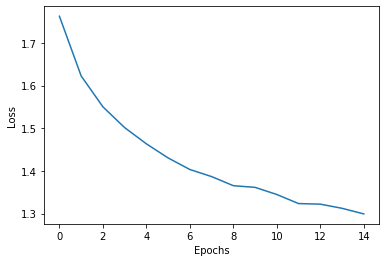

In [23]:
epochs = [i for i in range(15)]
plt.plot(epochs, loss_vector)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

GroundTruth:    cat  ship  ship plane


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


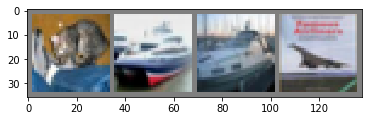

In [24]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()

# выведем наши предсказания
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % CLASSES[labels[j]] for j in range(4)))

outputs=model(images)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % CLASSES[predicted[j]]
                              for j in range(4)))

Predicted:    cat truck plane  ship


In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 54 %


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        CLASSES[i], 100 * class_correct[i] / class_total[i]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of plane : 57 %
Accuracy of   car : 66 %
Accuracy of  bird : 39 %
Accuracy of   cat : 33 %
Accuracy of  deer : 46 %
Accuracy of   dog : 41 %
Accuracy of  frog : 64 %
Accuracy of horse : 61 %
Accuracy of  ship : 70 %
Accuracy of truck : 58 %
